In [23]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from copy import deepcopy

In [24]:
# Option 1: Load an existing image
image = Image.open('image.png').convert('L')  # Convert to grayscale
# Convert the PIL image to a NumPy array for processing
img_array = np.array(image)

print("Original Image Matrix:")
print(img_array)

Original Image Matrix:
[[223 224 224 ...  49  41  38]
 [223 224 224 ...  70  54  43]
 [223 224 224 ...  84  69  62]
 ...
 [160 154 154 ... 148 150 157]
 [166 159 151 ... 147 160 168]
 [159 144 163 ... 148 173 185]]


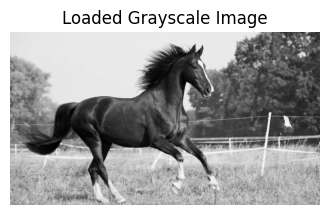

In [25]:
# Display the image visually
plt.figure(figsize=(4,4))
plt.imshow(img_array, cmap='gray')
plt.title("Loaded Grayscale Image")
plt.axis('off')
plt.show()

In [26]:
image.size

(604, 337)

In [27]:
img_array.size

203548

In [28]:
# Set the number of quantization levels
K = 3

In [29]:
# Determine the global min and max in the image
min_val, max_val = img_array.min(), img_array.max()
print("\nImage Min and Max:", min_val, max_val)


Image Min and Max: 1 255


In [30]:
# Initialize boundaries as evenly spaced points between min and max
boundaries = np.linspace(min_val, max_val, K+1)  
print("\nInitial Boundaries:", boundaries)


Initial Boundaries: [  1.          85.66666667 170.33333333 255.        ]


In [31]:
# Initialize centroids as the midpoint of each interval
centroids = np.array([(boundaries[i] + boundaries[i+1]) / 2 for i in range(K)])
print("Initial Centroids:", centroids)

Initial Centroids: [ 43.33333333 128.         212.66666667]


In [32]:
# Compute and print the frequency of each intensity in the image
unique_values, counts = np.unique(img_array, return_counts=True)
print("\nPixel Intensity Counts:")
for value, count in zip(unique_values, counts):
    print(f"Intensity {value:.0f}: {count} pixels")


Pixel Intensity Counts:
Intensity 1: 11 pixels
Intensity 2: 58 pixels
Intensity 3: 126 pixels
Intensity 4: 164 pixels
Intensity 5: 262 pixels
Intensity 6: 290 pixels
Intensity 7: 343 pixels
Intensity 8: 398 pixels
Intensity 9: 396 pixels
Intensity 10: 451 pixels
Intensity 11: 540 pixels
Intensity 12: 576 pixels
Intensity 13: 554 pixels
Intensity 14: 553 pixels
Intensity 15: 505 pixels
Intensity 16: 491 pixels
Intensity 17: 448 pixels
Intensity 18: 366 pixels
Intensity 19: 420 pixels
Intensity 20: 382 pixels
Intensity 21: 394 pixels
Intensity 22: 390 pixels
Intensity 23: 382 pixels
Intensity 24: 399 pixels
Intensity 25: 381 pixels
Intensity 26: 389 pixels
Intensity 27: 428 pixels
Intensity 28: 405 pixels
Intensity 29: 407 pixels
Intensity 30: 437 pixels
Intensity 31: 394 pixels
Intensity 32: 401 pixels
Intensity 33: 408 pixels
Intensity 34: 482 pixels
Intensity 35: 415 pixels
Intensity 36: 465 pixels
Intensity 37: 518 pixels
Intensity 38: 519 pixels
Intensity 39: 524 pixels
Intensity 4

In [33]:
# Detailed calculation of initial centroids
print("\nCalculation of Initial Centroids:")
for i in range(K):
    left = boundaries[i]
    right = boundaries[i+1]
    centroid = (left + right) / 2
    print(f"Interval {i+1}: ({left} + {right}) / 2 = {centroid}")


Calculation of Initial Centroids:
Interval 1: (1.0 + 85.66666666666667) / 2 = 43.333333333333336
Interval 2: (85.66666666666667 + 170.33333333333334) / 2 = 128.0
Interval 3: (170.33333333333334 + 255.0) / 2 = 212.66666666666669


In [34]:
def quantize_image(img, boundaries, centroids, K):
    """
    Given an image array, boundaries, and centroids,
    assign each pixel to the centroid corresponding to the interval the pixel falls in.
    """
    quantized = np.zeros_like(img, dtype=np.float32)
    for i in range(K):
        # For clusters except the last, pixels equal to the right boundary are excluded
        if i < K - 1:
            mask = (img >= boundaries[i]) & (img < boundaries[i+1])
        else:
            mask = (img >= boundaries[i]) & (img <= boundaries[i+1])
        quantized[mask] = centroids[i]
    return quantized

In [35]:
# Perform iterative quantization for 5 iterations
iterations = 20


Iteration 1 Quantized Image Matrix:
[[212.66667  212.66667  212.66667  ...  43.333332  43.333332  43.333332]
 [212.66667  212.66667  212.66667  ...  43.333332  43.333332  43.333332]
 [212.66667  212.66667  212.66667  ...  43.333332  43.333332  43.333332]
 ...
 [128.       128.       128.       ... 128.       128.       128.      ]
 [128.       128.       128.       ... 128.       128.       128.      ]
 [128.       128.       128.       ... 128.       212.66667  212.66667 ]]


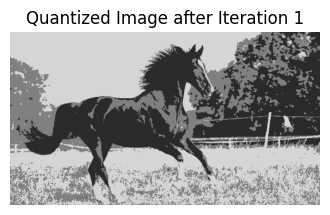

Updated Centroids: [ 52.4814227  129.05514531 210.49358283]
Updated Boundaries: [  1.          90.76828401 169.77436407 255.        ]

Iteration 2 Quantized Image Matrix:
[[210.49358  210.49358  210.49358  ...  52.481422  52.481422  52.481422]
 [210.49358  210.49358  210.49358  ...  52.481422  52.481422  52.481422]
 [210.49358  210.49358  210.49358  ...  52.481422  52.481422  52.481422]
 ...
 [129.05515  129.05515  129.05515  ... 129.05515  129.05515  129.05515 ]
 [129.05515  129.05515  129.05515  ... 129.05515  129.05515  129.05515 ]
 [129.05515  129.05515  129.05515  ... 129.05515  210.49358  210.49358 ]]


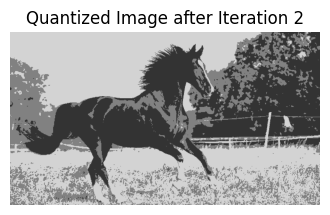

Updated Centroids: [ 54.61671194 131.3309169  210.00842781]
Updated Boundaries: [  1.          92.97381442 170.66967236 255.        ]

Iteration 3 Quantized Image Matrix:
[[210.00842 210.00842 210.00842 ...  54.61671  54.61671  54.61671]
 [210.00842 210.00842 210.00842 ...  54.61671  54.61671  54.61671]
 [210.00842 210.00842 210.00842 ...  54.61671  54.61671  54.61671]
 ...
 [131.33092 131.33092 131.33092 ... 131.33092 131.33092 131.33092]
 [131.33092 131.33092 131.33092 ... 131.33092 131.33092 131.33092]
 [131.33092 131.33092 131.33092 ... 131.33092 210.00842 210.00842]]


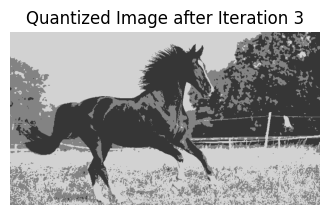

Updated Centroids: [ 55.48474535 133.41558915 210.49358283]
Updated Boundaries: [  1.          94.45016725 171.95458599 255.        ]

Iteration 4 Quantized Image Matrix:
[[210.49358  210.49358  210.49358  ...  55.484745  55.484745  55.484745]
 [210.49358  210.49358  210.49358  ...  55.484745  55.484745  55.484745]
 [210.49358  210.49358  210.49358  ...  55.484745  55.484745  55.484745]
 ...
 [133.41559  133.41559  133.41559  ... 133.41559  133.41559  133.41559 ]
 [133.41559  133.41559  133.41559  ... 133.41559  133.41559  133.41559 ]
 [133.41559  133.41559  133.41559  ... 133.41559  210.49358  210.49358 ]]


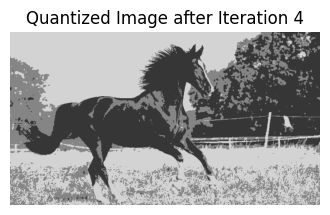

Updated Centroids: [ 56.31391251 135.4412119  210.98519673]
Updated Boundaries: [  1.          95.8775622  173.21320432 255.        ]

Iteration 5 Quantized Image Matrix:
[[210.9852  210.9852  210.9852  ...  56.31391  56.31391  56.31391]
 [210.9852  210.9852  210.9852  ...  56.31391  56.31391  56.31391]
 [210.9852  210.9852  210.9852  ...  56.31391  56.31391  56.31391]
 ...
 [135.44121 135.44121 135.44121 ... 135.44121 135.44121 135.44121]
 [135.44121 135.44121 135.44121 ... 135.44121 135.44121 135.44121]
 [135.44121 135.44121 135.44121 ... 135.44121 135.44121 210.9852 ]]


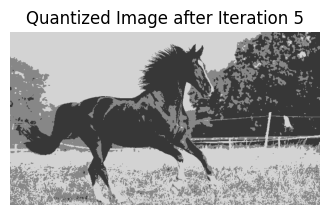

Updated Centroids: [ 56.75440703 137.6838473  211.97823144]
Updated Boundaries: [  1.          97.21912717 174.83103937 255.        ]

Iteration 6 Quantized Image Matrix:
[[211.97823  211.97823  211.97823  ...  56.754406  56.754406  56.754406]
 [211.97823  211.97823  211.97823  ...  56.754406  56.754406  56.754406]
 [211.97823  211.97823  211.97823  ...  56.754406  56.754406  56.754406]
 ...
 [137.68385  137.68385  137.68385  ... 137.68385  137.68385  137.68385 ]
 [137.68385  137.68385  137.68385  ... 137.68385  137.68385  137.68385 ]
 [137.68385  137.68385  137.68385  ... 137.68385  137.68385  211.97823 ]]


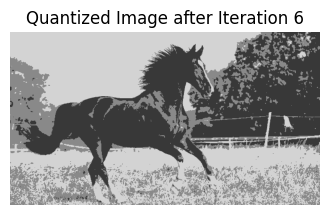

Updated Centroids: [ 57.605577   139.69748436 212.47173515]
Updated Boundaries: [  1.          98.65153068 176.08460976 255.        ]

Iteration 7 Quantized Image Matrix:
[[212.47174  212.47174  212.47174  ...  57.605576  57.605576  57.605576]
 [212.47174  212.47174  212.47174  ...  57.605576  57.605576  57.605576]
 [212.47174  212.47174  212.47174  ...  57.605576  57.605576  57.605576]
 ...
 [139.69748  139.69748  139.69748  ... 139.69748  139.69748  139.69748 ]
 [139.69748  139.69748  139.69748  ... 139.69748  139.69748  139.69748 ]
 [139.69748  139.69748  139.69748  ... 139.69748  139.69748  212.47174 ]]


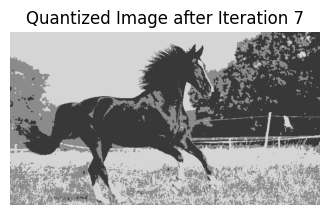

Updated Centroids: [ 58.00939358 141.90062448 213.53847183]
Updated Boundaries: [  1.          99.95500903 177.71954816 255.        ]

Iteration 8 Quantized Image Matrix:
[[213.53847 213.53847 213.53847 ...  58.00939  58.00939  58.00939]
 [213.53847 213.53847 213.53847 ...  58.00939  58.00939  58.00939]
 [213.53847 213.53847 213.53847 ...  58.00939  58.00939  58.00939]
 ...
 [141.90062 141.90062 141.90062 ... 141.90062 141.90062 141.90062]
 [141.90062 141.90062 141.90062 ... 141.90062 141.90062 141.90062]
 [141.90062 141.90062 141.90062 ... 141.90062 141.90062 213.53847]]


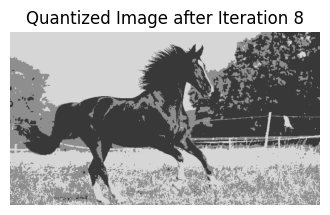

Updated Centroids: [ 58.40068001 143.26149106 214.08250923]
Updated Boundaries: [  1.         100.83108554 178.67200015 255.        ]

Iteration 9 Quantized Image Matrix:
[[214.0825  214.0825  214.0825  ...  58.40068  58.40068  58.40068]
 [214.0825  214.0825  214.0825  ...  58.40068  58.40068  58.40068]
 [214.0825  214.0825  214.0825  ...  58.40068  58.40068  58.40068]
 ...
 [143.26149 143.26149 143.26149 ... 143.26149 143.26149 143.26149]
 [143.26149 143.26149 143.26149 ... 143.26149 143.26149 143.26149]
 [143.26149 143.26149 143.26149 ... 143.26149 143.26149 214.0825 ]]


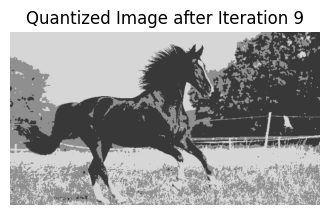

Updated Centroids: [ 58.835208   144.65928708 214.62374687]
Updated Boundaries: [  1.         101.74724754 179.64151698 255.        ]

Iteration 10 Quantized Image Matrix:
[[214.62375 214.62375 214.62375 ...  58.83521  58.83521  58.83521]
 [214.62375 214.62375 214.62375 ...  58.83521  58.83521  58.83521]
 [214.62375 214.62375 214.62375 ...  58.83521  58.83521  58.83521]
 ...
 [144.65929 144.65929 144.65929 ... 144.65929 144.65929 144.65929]
 [144.65929 144.65929 144.65929 ... 144.65929 144.65929 144.65929]
 [144.65929 144.65929 144.65929 ... 144.65929 144.65929 214.62375]]


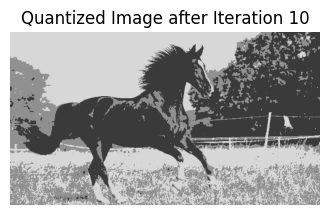

Updated Centroids: [ 59.25014984 145.98020845 215.14324946]
Updated Boundaries: [  1.         102.61517915 180.56172896 255.        ]

Iteration 11 Quantized Image Matrix:
[[215.14325 215.14325 215.14325 ...  59.25015  59.25015  59.25015]
 [215.14325 215.14325 215.14325 ...  59.25015  59.25015  59.25015]
 [215.14325 215.14325 215.14325 ...  59.25015  59.25015  59.25015]
 ...
 [145.98021 145.98021 145.98021 ... 145.98021 145.98021 145.98021]
 [145.98021 145.98021 145.98021 ... 145.98021 145.98021 145.98021]
 [145.98021 145.98021 145.98021 ... 145.98021 145.98021 215.14325]]


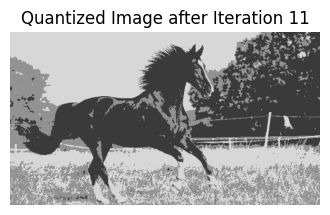

Updated Centroids: [ 59.67376033 147.32885856 215.6868117 ]
Updated Boundaries: [  1.         103.50130945 181.50783513 255.        ]

Iteration 12 Quantized Image Matrix:
[[215.68681 215.68681 215.68681 ...  59.67376  59.67376  59.67376]
 [215.68681 215.68681 215.68681 ...  59.67376  59.67376  59.67376]
 [215.68681 215.68681 215.68681 ...  59.67376  59.67376  59.67376]
 ...
 [147.32886 147.32886 147.32886 ... 147.32886 147.32886 147.32886]
 [147.32886 147.32886 147.32886 ... 147.32886 147.32886 147.32886]
 [147.32886 147.32886 147.32886 ... 147.32886 147.32886 215.68681]]


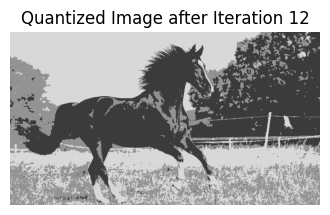

Updated Centroids: [ 60.09007408 148.62767137 216.21465646]
Updated Boundaries: [  1.         104.35887273 182.42116392 255.        ]

Iteration 13 Quantized Image Matrix:
[[216.21466  216.21466  216.21466  ...  60.090073  60.090073  60.090073]
 [216.21466  216.21466  216.21466  ...  60.090073  60.090073  60.090073]
 [216.21466  216.21466  216.21466  ...  60.090073  60.090073  60.090073]
 ...
 [148.62767  148.62767  148.62767  ... 148.62767  148.62767  148.62767 ]
 [148.62767  148.62767  148.62767  ... 148.62767  148.62767  148.62767 ]
 [148.62767  148.62767  148.62767  ... 148.62767  148.62767  216.21466 ]]


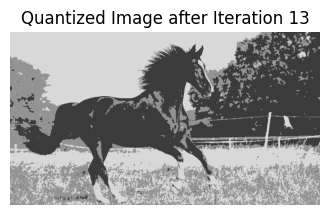

Updated Centroids: [ 60.50974712 149.95906336 216.77761494]
Updated Boundaries: [  1.         105.23440524 183.36833915 255.        ]

Iteration 14 Quantized Image Matrix:
[[216.77762  216.77762  216.77762  ...  60.509747  60.509747  60.509747]
 [216.77762  216.77762  216.77762  ...  60.509747  60.509747  60.509747]
 [216.77762  216.77762  216.77762  ...  60.509747  60.509747  60.509747]
 ...
 [149.95906  149.95906  149.95906  ... 149.95906  149.95906  149.95906 ]
 [149.95906  149.95906  149.95906  ... 149.95906  149.95906  149.95906 ]
 [149.95906  149.95906  149.95906  ... 149.95906  149.95906  216.77762 ]]


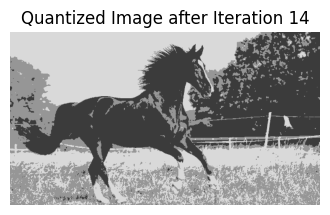

Updated Centroids: [ 60.91497981 151.24553167 217.33756349]
Updated Boundaries: [  1.         106.08025574 184.29154758 255.        ]

Iteration 15 Quantized Image Matrix:
[[217.33757  217.33757  217.33757  ...  60.914978  60.914978  60.914978]
 [217.33757  217.33757  217.33757  ...  60.914978  60.914978  60.914978]
 [217.33757  217.33757  217.33757  ...  60.914978  60.914978  60.914978]
 ...
 [151.24553  151.24553  151.24553  ... 151.24553  151.24553  151.24553 ]
 [151.24553  151.24553  151.24553  ... 151.24553  151.24553  151.24553 ]
 [151.24553  151.24553  151.24553  ... 151.24553  151.24553  217.33757 ]]


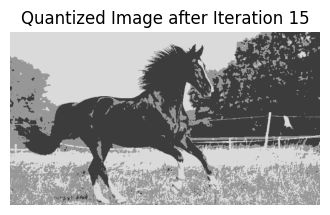

Updated Centroids: [ 61.34804039 152.57088226 217.91401212]
Updated Boundaries: [  1.         106.95946132 185.24244719 255.        ]

Iteration 16 Quantized Image Matrix:
[[217.91402 217.91402 217.91402 ...  61.34804  61.34804  61.34804]
 [217.91402 217.91402 217.91402 ...  61.34804  61.34804  61.34804]
 [217.91402 217.91402 217.91402 ...  61.34804  61.34804  61.34804]
 ...
 [152.57088 152.57088 152.57088 ... 152.57088 152.57088 152.57088]
 [152.57088 152.57088 152.57088 ... 152.57088 152.57088 152.57088]
 [152.57088 152.57088 152.57088 ... 152.57088 152.57088 152.57088]]


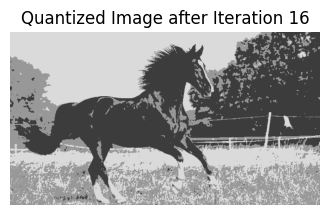

Updated Centroids: [ 61.34804039 153.24868599 218.46218711]
Updated Boundaries: [  1.         107.29836319 185.85543655 255.        ]

Iteration 17 Quantized Image Matrix:
[[218.46219 218.46219 218.46219 ...  61.34804  61.34804  61.34804]
 [218.46219 218.46219 218.46219 ...  61.34804  61.34804  61.34804]
 [218.46219 218.46219 218.46219 ...  61.34804  61.34804  61.34804]
 ...
 [153.24869 153.24869 153.24869 ... 153.24869 153.24869 153.24869]
 [153.24869 153.24869 153.24869 ... 153.24869 153.24869 153.24869]
 [153.24869 153.24869 153.24869 ... 153.24869 153.24869 153.24869]]


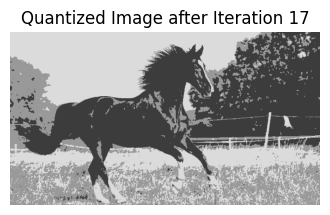

Updated Centroids: [ 61.73889621 153.78323879 218.46218711]
Updated Boundaries: [  1.         107.7610675  186.12271295 255.        ]

Iteration 18 Quantized Image Matrix:
[[218.46219  218.46219  218.46219  ...  61.738895  61.738895  61.738895]
 [218.46219  218.46219  218.46219  ...  61.738895  61.738895  61.738895]
 [218.46219  218.46219  218.46219  ...  61.738895  61.738895  61.738895]
 ...
 [153.78323  153.78323  153.78323  ... 153.78323  153.78323  153.78323 ]
 [153.78323  153.78323  153.78323  ... 153.78323  153.78323  153.78323 ]
 [153.78323  153.78323  153.78323  ... 153.78323  153.78323  153.78323 ]]


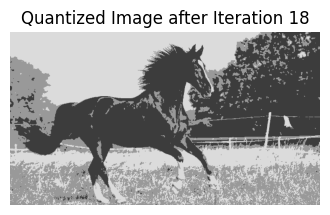

Updated Centroids: [ 61.73889621 154.46895231 219.02798997]
Updated Boundaries: [  1.         108.10392426 186.74847114 255.        ]

Iteration 19 Quantized Image Matrix:
[[219.02798  219.02798  219.02798  ...  61.738895  61.738895  61.738895]
 [219.02798  219.02798  219.02798  ...  61.738895  61.738895  61.738895]
 [219.02798  219.02798  219.02798  ...  61.738895  61.738895  61.738895]
 ...
 [154.46895  154.46895  154.46895  ... 154.46895  154.46895  154.46895 ]
 [154.46895  154.46895  154.46895  ... 154.46895  154.46895  154.46895 ]
 [154.46895  154.46895  154.46895  ... 154.46895  154.46895  154.46895 ]]


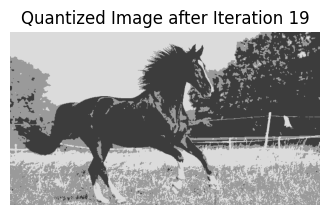

Updated Centroids: [ 62.11002953 154.97086866 219.02798997]
Updated Boundaries: [  1.         108.5404491  186.99942931 255.        ]

Iteration 20 Quantized Image Matrix:
[[219.02798 219.02798 219.02798 ...  62.11003  62.11003  62.11003]
 [219.02798 219.02798 219.02798 ...  62.11003  62.11003  62.11003]
 [219.02798 219.02798 219.02798 ...  62.11003  62.11003  62.11003]
 ...
 [154.97087 154.97087 154.97087 ... 154.97087 154.97087 154.97087]
 [154.97087 154.97087 154.97087 ... 154.97087 154.97087 154.97087]
 [154.97087 154.97087 154.97087 ... 154.97087 154.97087 154.97087]]


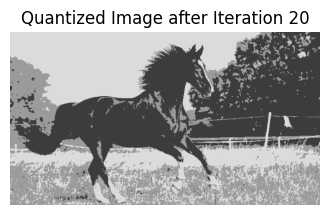

Updated Centroids: [ 62.11002953 154.97086866 219.02798997]
Updated Boundaries: [  1.         108.5404491  186.99942931 255.        ]


In [36]:
for it in range(iterations):
    # Step 1: Quantize the image with the current centroids and boundaries
    quantized_image = quantize_image(img_array, boundaries, centroids, K)
    
    print(f"\nIteration {it+1} Quantized Image Matrix:")
    print(quantized_image)
    
    # Display the quantized image visually
    plt.figure(figsize=(4,4))
    plt.imshow(quantized_image, cmap='gray', vmin=img_array.min(), vmax=img_array.max())
    plt.title(f"Quantized Image after Iteration {it+1}")
    plt.axis('off')
    plt.show()
    
    # Step 2: Update centroids
    new_centroids = np.zeros_like(centroids)
    for i in range(K):
        if i < K - 1:
            mask = (img_array >= boundaries[i]) & (img_array < boundaries[i+1])
        else:
            mask = (img_array >= boundaries[i]) & (img_array <= boundaries[i+1])
        if np.sum(mask) > 0:
            new_centroids[i] = np.mean(img_array[mask])
        else:
            new_centroids[i] = centroids[i]  # If no pixel falls in the cluster, keep the old value
    
    # Step 3: Update boundaries
    new_boundaries = boundaries.copy()
    for i in range(1, K):
        new_boundaries[i] = (new_centroids[i-1] + new_centroids[i]) / 2
    
    # Print updated centroids and boundaries for this iteration
    print("Updated Centroids:", new_centroids)
    print("Updated Boundaries:", new_boundaries)
    
    # Update centroids and boundaries for the next iteration
    centroids = new_centroids
    boundaries = new_boundaries
